In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import logging 
import math
import vanet_tools as vp

In [3]:
df = pd.read_csv("manhattan_out.csv",delimiter=";").dropna()
MICROCLOUD_RANGE=150

In [4]:
df

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y
0,0.0,270.00,0.0,4/6to3/6_0,5.10,0.0,0.00,DEFAULT_VEHTYPE,790.15,1201.65
1,1.0,270.00,0.0,4/6to3/6_0,6.54,0.0,1.44,DEFAULT_VEHTYPE,788.71,1201.65
2,1.0,90.00,1.0,7/0to8/0_0,5.10,0.0,0.00,DEFAULT_VEHTYPE,1409.85,-1.65
3,2.0,270.00,0.0,4/6to3/6_0,9.66,0.0,3.12,DEFAULT_VEHTYPE,785.59,1201.65
4,2.0,90.00,1.0,7/0to8/0_0,7.64,0.0,2.54,DEFAULT_VEHTYPE,1412.39,-1.65
5,2.0,90.00,2.0,5/8to6/8_0,5.10,0.0,0.00,DEFAULT_VEHTYPE,1009.85,1598.35
6,3.0,270.00,0.0,4/6to3/6_0,14.73,0.0,5.08,DEFAULT_VEHTYPE,780.52,1201.65
7,3.0,90.00,1.0,7/0to8/0_0,12.01,0.0,4.37,DEFAULT_VEHTYPE,1416.76,-1.65
8,3.0,90.00,2.0,5/8to6/8_0,7.64,0.0,2.54,DEFAULT_VEHTYPE,1012.39,1598.35
9,3.0,270.00,3.0,5/2to4/2_0,5.10,0.0,0.00,DEFAULT_VEHTYPE,990.15,401.65


Checking if cars rode for a reasonable amount of time

In [5]:
groups = df.groupby('vehicle_id')
vehicles = df['vehicle_id'].unique()
vehicle_times = [len(groups.get_group(vehicle)) for vehicle in vehicles]

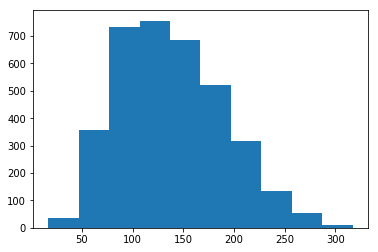

In [6]:
plt.hist(vehicle_times)
plt.show()

In [7]:
np.mean(vehicle_times)

137.79944444444445

In [8]:
simulator = vp.Simulator(df)

In [9]:
coordinates = df[['vehicle_x','vehicle_y']]

In [10]:
coords_x,coords_y = coordinates['vehicle_x'],coordinates['vehicle_y']

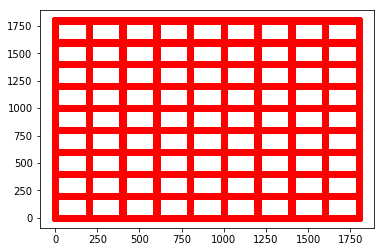

In [11]:
plt.scatter(coords_x,coords_y,c='red')
plt.show()

In [12]:
NUM_MICROCLOUDS = 70

In [13]:
microclouds_coords = vp.create_coords(coordinates,MICROCLOUD_RANGE,num_microclouds=NUM_MICROCLOUDS)

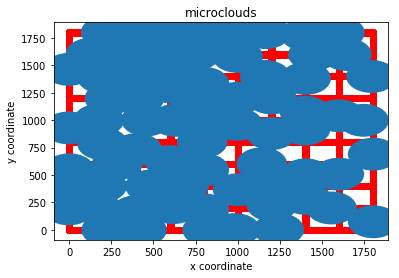

In [14]:
vp.plot_microclouds(microclouds_coords,MICROCLOUD_RANGE,coords_x,coords_y)

In [15]:
config_file = "manhattan_config.csv"

In [16]:
vp.store_microcloud_config(microclouds_coords,config_file)

In [17]:
#Making sure the microclouds were stored
microclouds_coords = vp.parse_configuration(config_file)

In [18]:
TOTAL_BLOCKS=12

In [19]:
results = simulator.simulation_by_number_of_clouds(microclouds_coords,MICROCLOUD_RANGE,step=5,total_blocks=TOTAL_BLOCKS)

INFO:root:Setting up simulation with 1 num of clouds
INFO:root:Finished setup started simulation with 1 microclouds
INFO:root:Setting up simulation with 6 num of clouds
INFO:root:Finished setup started simulation with 6 microclouds
INFO:root:Setting up simulation with 11 num of clouds
INFO:root:Finished setup started simulation with 11 microclouds
INFO:root:Setting up simulation with 16 num of clouds
INFO:root:Finished setup started simulation with 16 microclouds
INFO:root:Setting up simulation with 21 num of clouds
INFO:root:Finished setup started simulation with 21 microclouds
INFO:root:Setting up simulation with 26 num of clouds
INFO:root:Finished setup started simulation with 26 microclouds
INFO:root:Setting up simulation with 31 num of clouds
INFO:root:Finished setup started simulation with 31 microclouds
INFO:root:Setting up simulation with 36 num of clouds
INFO:root:Finished setup started simulation with 36 microclouds
INFO:root:Setting up simulation with 41 num of clouds
INFO:r

In [20]:
results_df = pd.DataFrame(results)

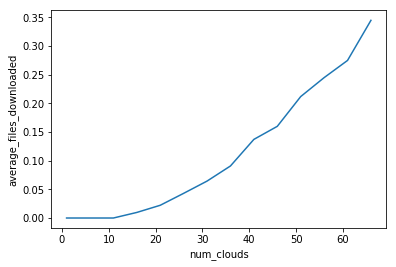

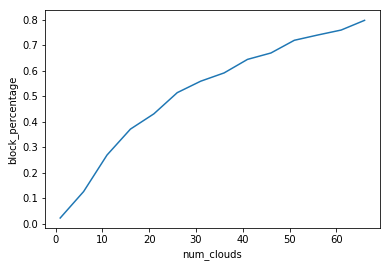

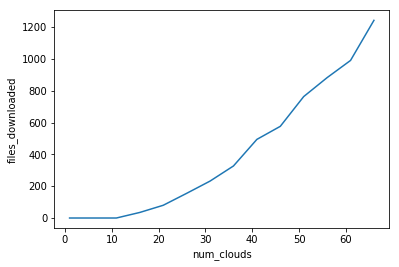

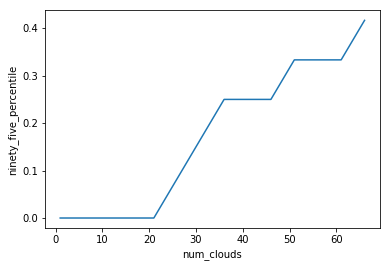

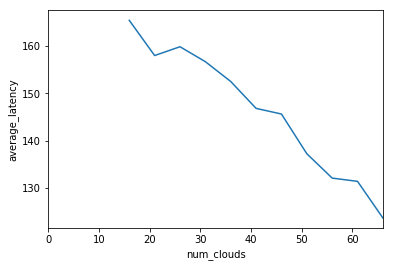

In [21]:
vp.plot_results(results_df)

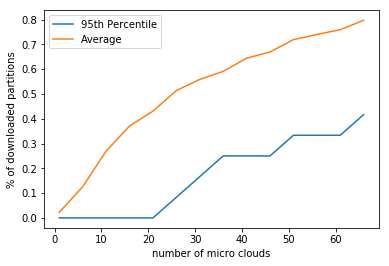

In [22]:
vp.plot_important(results_df)

In [23]:
results_max =simulator.simulation_by_number_of_clouds(microclouds_coords,MICROCLOUD_RANGE,step=5,bandwith=5)

INFO:root:Setting up simulation with 1 num of clouds
INFO:root:Finished setup started simulation with 1 microclouds
INFO:root:Setting up simulation with 6 num of clouds
INFO:root:Finished setup started simulation with 6 microclouds
INFO:root:Setting up simulation with 11 num of clouds
INFO:root:Finished setup started simulation with 11 microclouds
INFO:root:Setting up simulation with 16 num of clouds
INFO:root:Finished setup started simulation with 16 microclouds
INFO:root:Setting up simulation with 21 num of clouds
INFO:root:Finished setup started simulation with 21 microclouds
INFO:root:Setting up simulation with 26 num of clouds
INFO:root:Finished setup started simulation with 26 microclouds
INFO:root:Setting up simulation with 31 num of clouds
INFO:root:Finished setup started simulation with 31 microclouds
INFO:root:Setting up simulation with 36 num of clouds
INFO:root:Finished setup started simulation with 36 microclouds
INFO:root:Setting up simulation with 41 num of clouds
INFO:r

In [24]:
results_max_df = pd.DataFrame(results_max)

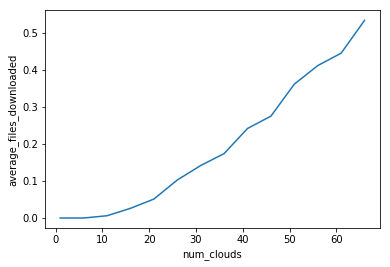

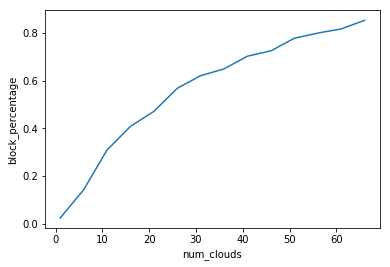

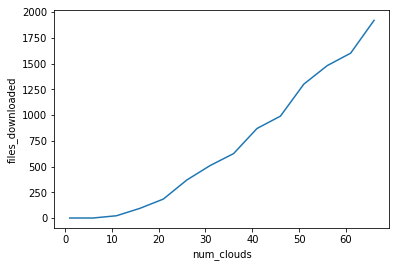

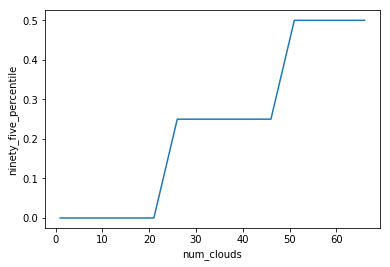

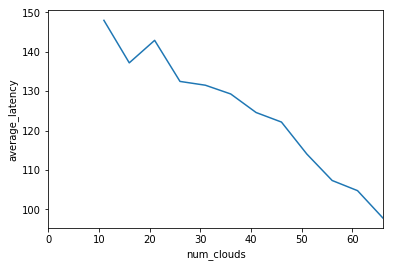

In [25]:
vp.plot_results(results_max_df)

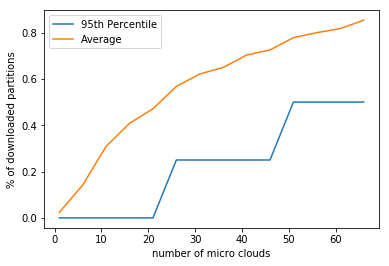

In [26]:
vp.plot_important(results_max_df)

In [27]:
MICROCLOUD_LONG_RANGE =300

In [28]:
microclouds_coords_long_range = vp.create_coords(coordinates,MICROCLOUD_LONG_RANGE,num_microclouds=25)

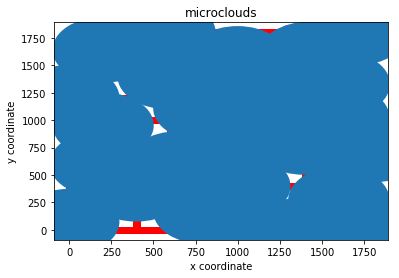

In [29]:
vp.plot_microclouds(microclouds_coords_long_range,MICROCLOUD_LONG_RANGE,coords_x,coords_y)

In [30]:
long_results = simulator.simulation_by_number_of_clouds(microclouds_coords_long_range,MICROCLOUD_LONG_RANGE,step=2)

INFO:root:Setting up simulation with 1 num of clouds
INFO:root:Finished setup started simulation with 1 microclouds
INFO:root:Setting up simulation with 3 num of clouds
INFO:root:Finished setup started simulation with 3 microclouds
INFO:root:Setting up simulation with 5 num of clouds
INFO:root:Finished setup started simulation with 5 microclouds
INFO:root:Setting up simulation with 7 num of clouds
INFO:root:Finished setup started simulation with 7 microclouds
INFO:root:Setting up simulation with 9 num of clouds
INFO:root:Finished setup started simulation with 9 microclouds
INFO:root:Setting up simulation with 11 num of clouds
INFO:root:Finished setup started simulation with 11 microclouds
INFO:root:Setting up simulation with 13 num of clouds
INFO:root:Finished setup started simulation with 13 microclouds
INFO:root:Setting up simulation with 15 num of clouds
INFO:root:Finished setup started simulation with 15 microclouds
INFO:root:Setting up simulation with 17 num of clouds
INFO:root:Fi

In [31]:
long_results_df = pd.DataFrame(long_results)

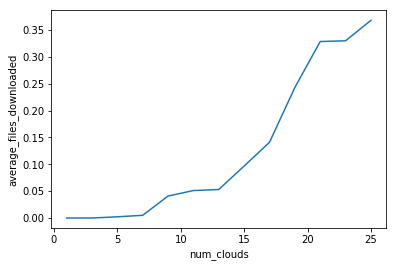

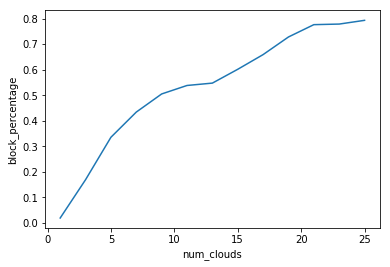

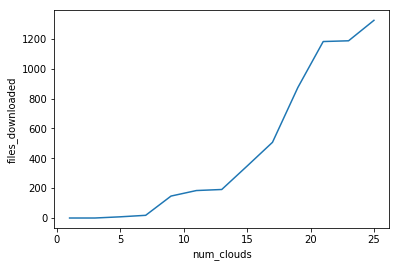

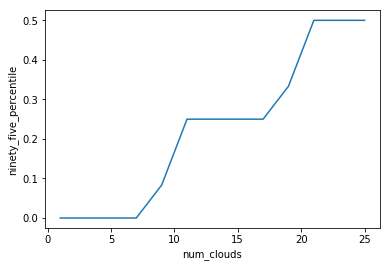

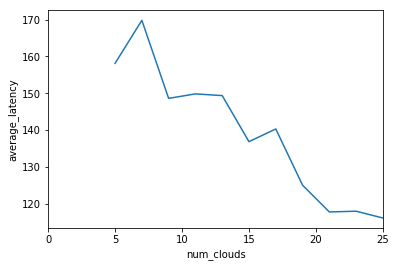

In [32]:
vp.plot_results(long_results_df)

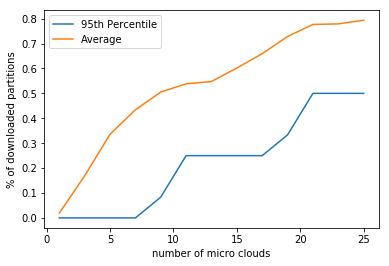

In [33]:
vp.plot_important(long_results_df)

In [34]:
long_results_max = simulator.simulation_by_number_of_clouds(microclouds_coords_long_range,MICROCLOUD_LONG_RANGE,step=2,bandwith=5)

INFO:root:Setting up simulation with 1 num of clouds
INFO:root:Finished setup started simulation with 1 microclouds
INFO:root:Setting up simulation with 3 num of clouds
INFO:root:Finished setup started simulation with 3 microclouds
INFO:root:Setting up simulation with 5 num of clouds
INFO:root:Finished setup started simulation with 5 microclouds
INFO:root:Setting up simulation with 7 num of clouds
INFO:root:Finished setup started simulation with 7 microclouds
INFO:root:Setting up simulation with 9 num of clouds
INFO:root:Finished setup started simulation with 9 microclouds
INFO:root:Setting up simulation with 11 num of clouds
INFO:root:Finished setup started simulation with 11 microclouds
INFO:root:Setting up simulation with 13 num of clouds
INFO:root:Finished setup started simulation with 13 microclouds
INFO:root:Setting up simulation with 15 num of clouds
INFO:root:Finished setup started simulation with 15 microclouds
INFO:root:Setting up simulation with 17 num of clouds
INFO:root:Fi

In [35]:
long_results_max_df = pd.DataFrame(long_results_max)

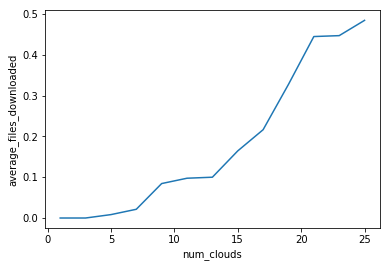

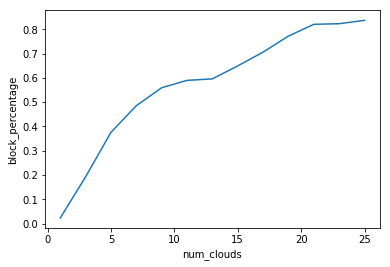

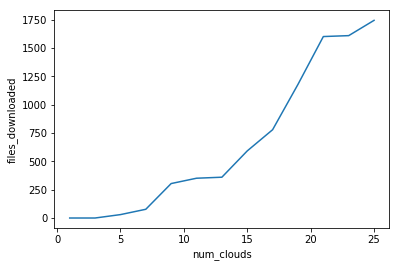

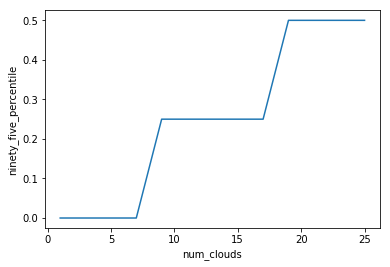

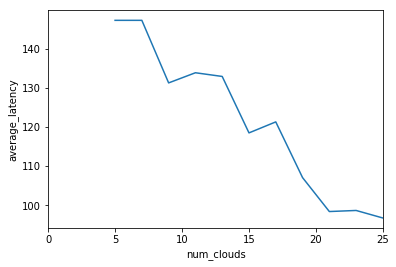

In [36]:
vp.plot_results(long_results_max_df)

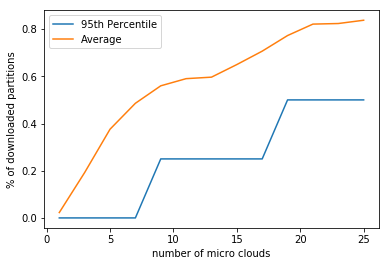

In [37]:
vp.plot_important(long_results_max_df)